In [7]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [8]:
# Warmup 1: Finish the FireHydrant example from last lecture

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
import requests

In [2]:
matplotlib.rcParams["font.size"] = 16

# Lecture 38: Plotting 4

Learning Objectives:
- Set plotting axes limits
- Set an axis to show logarithmic scale
- Create multiple plots within the same figure

## IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris

In [11]:
# Can you get this data and save it to a local file named "iris.csv" ? 

resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")


# check to see if you made the file in the Jupyter Notebook tab



In [13]:
# read the csv file into a DataFrame
# include the column names:  names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"]

df = pd.read_csv("iris.csv",
                 names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# store the unique names of the varities in a list called varieties
varieties = None
varieties

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [15]:
### Set plotting axes limits

### How do we control the *axes range* of values?
### Let us consider plotting just the data for class "Iris-virginica"


In [16]:
# make df_sub store the values for "Iris-virginica"

df_sub = df[df["class"] == "Iris-virginica"]

# show the head
df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

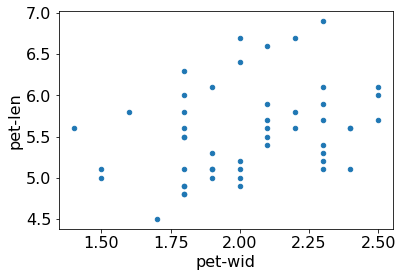

In [17]:
# make a scatter plot of "pet-wid" vs "pet-len" 


### Set plotting axes limits with  `xlim` and `ylim`

- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

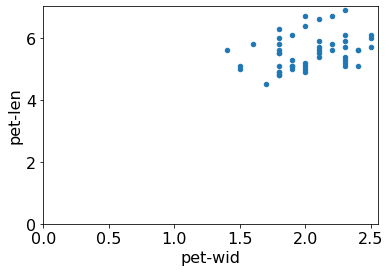

In [18]:
# make a scatter plot with xlim=0 and ylim=0
df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim = 0, ylim = 0)

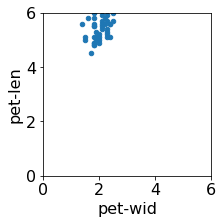

In [19]:
# make a scatter with the xlim from 0 to 6 and ylim from 0 to 6 and figsize = (3,3)
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",

                    figsize = (3, 3))
# what's wrong with this picture? 

In [ ]:
#What is the max value of "pet-len"?  


# max value of of "pet-wid" ? 


In [ ]:
# What are our current  y limits? 
print(ax.get_ylim())


# What are our current  x limits? 



Let's include assert statements to make sure we don't crop the plot!

In [ ]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))

# complete the assert to show that the 'pet-len' max value is withing our ylim (the 6)

assert df_sub["pet-len"].max() <= 0 # fix this 

In [ ]:
# note that we fixed the ylim and changed xlim to look good
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))

# Write 4 assert statements to show that our 4 borders contain all the data


## Set an axis to show logarithmic scale

Some Graphs don't make sense when shown on a 'linear' scale

https://ourworldindata.org/grapher/population

That's why its important to know how to graph using a Logarithmic scale

### What is a logarithm? 
- math.log(y, base)
- find an x, such that 10**x == y
    - math.log10(y)

In [ ]:
math.log10(1000)
#math.log10(100)

#math.log(32,2)
#math.log(256,2)

In [20]:
# a rough estimate of log base 10
# is to count how many digits a number has

def log_approx(y):
    assert type(y) == int
    assert y >= 1
    return len(str(y))

In [21]:
log_approx(123456789)

9

In [22]:
math.log10(123456789)

8.09151497716927

In [23]:
log_approx(989898)

6

In [24]:
math.log10(989898)

5.995590446800246

Let's look at the error margin

In [25]:
errors = []
for y in range(1, 1000001):
    err = abs(log_approx(y) - math.log10(y))
    errors.append(err)
max(errors)

1.0

### Why does this matter?
- Some plots will have a wide range of data values
- A linear scale on x or y axis will not show much
- A logirithmic scale will be better to give insight


<AxesSubplot:>

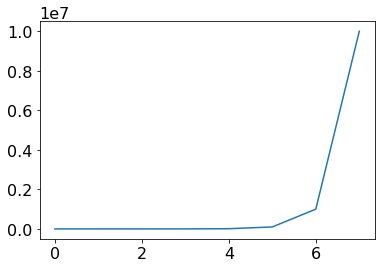

In [26]:
s = Series([10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7])
s.plot.line()

In [27]:
# source: https://www.worldometers.info/world-population/population-by-country/

# data estimated for the year 2020

pop = Series({"China":1439323776,
             "India": 1380004385,
              "Mexico": 128932753,
              "Senegal":16743927,
              "Bahrain":1701575,
              "Grenada":112523,
              "Tuvalu": 11792
             })

<AxesSubplot:>

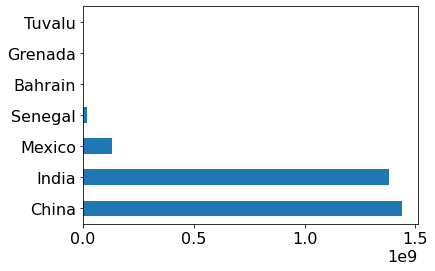

In [28]:
pop.plot.barh()

<AxesSubplot:>

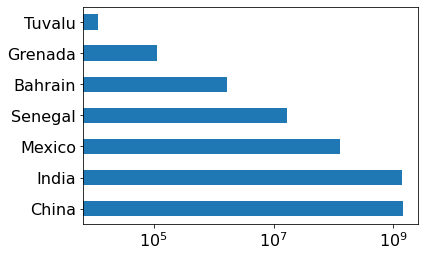

In [29]:
# change the plot to show a logarithmix x axis
pop.plot.barh(logx=True)

<AxesSubplot:>

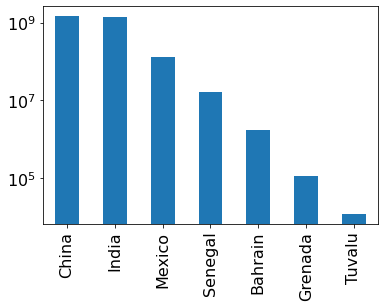

In [30]:
# do the same, but for a regular bar plot


## Create multiple subplots within the same plot
Final Topic: Multiple *axessubplots* in the same plot

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

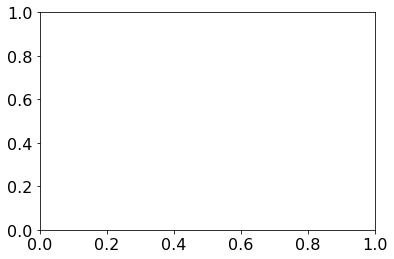

In [31]:
plt.subplots()

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

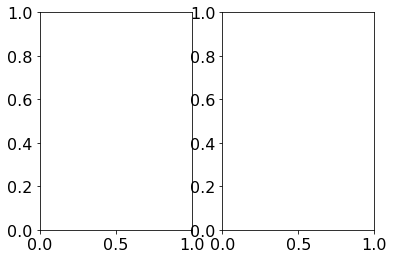

In [32]:
plt.subplots(ncols = 2)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

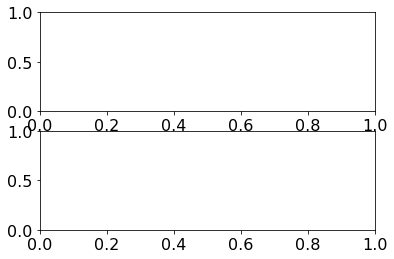

In [33]:
# make subplots with just 2 rows


(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

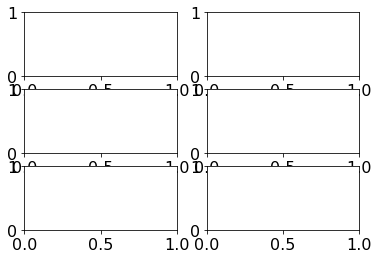

In [34]:
# make subplots with 2 cols and 3 rows


# hey what does our result mean? 

<AxesSubplot:>

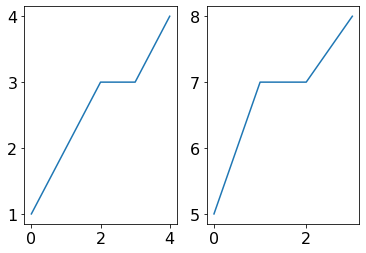

In [35]:
# Be careful when placing two graphs in the same plot
fig, axes = plt.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1, 2, 3, 3, 4]).plot.line(ax = axes[0])
Series([5, 7, 7, 8]).plot.line(ax = axes[1])

# These graphs are correct, but they give misleading information

<AxesSubplot:>

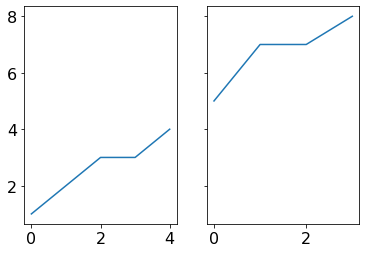

In [36]:
# We can fix this by using sharey=True....add that in here
fig, axes = plt.subplots(ncols = 2)  


# what is the comma doing there in line 2 ? 



# axes[0] # the area on the left
s1 = Series([1, 2, 3, 3, 4])
s1.plot.line(ax = axes[0])

# axes[1] # the area on the right
s2 = Series([5, 7, 7, 8])
s2.plot.line(ax = axes[1])



https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<AxesSubplot:>

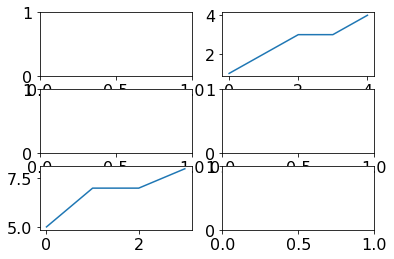

In [37]:
fig, axes = plt.subplots(ncols = 2, nrows = 3)

s1 = Series([1, 2, 3, 3, 4])
s1.plot.line(ax = axes[0][1]) # row=0, col=1

s2 = Series([5, 7, 7, 8])
s2.plot.line(ax = axes[2][0]) # row=2, col=0

In [ ]:
# Plot the sepal length vs the sepal width for each of the classes of flowers.
colors=["r", "g", "b"]
markers=[".", "^", "v"]
fig, axes = plt.subplots(ncols = 3, sharex = True, sharey = True, figsize=(12,3))
for i in range(len(varieties)):
    variety = varieties[i]
    specific_iris_data = iris_df[iris_df["class"] == variety]
    specific_iris_data.plot.scatter(x="sep-len", y='sep-wid', \
                                    ax=axes[i], color=colors[i], marker=markers[i])
    


In [ ]:
# Bonus: Plot a Histogram of the sepal/petal length/width on a 4x3 grid.
#        This is not content covered by the exam. It shows how useful subplots can be.

colors=["r", "g", "b"]
fig, axes = plt.subplots(ncols = 3, nrows = 4, sharex = True, sharey = True, figsize=(9,9))
for i in range(len(varieties)):
    variety = varieties[i]
    specific_iris_data = iris_df[iris_df["class"] == variety]
    specific_iris_data.plot.hist(x="class", y='sep-wid', \
                                    ax=axes[0][i], color=colors[i])
    
    specific_iris_data.plot.hist(x="class", y='sep-len', \
                                    ax=axes[1][i], color=colors[i])
    
    specific_iris_data.plot.hist(x="class", y='pet-wid', \
                                    ax=axes[2][i], color=colors[i])
    
    specific_iris_data.plot.hist(x="class", y='pet-len', \
                                    ax=axes[3][i], color=colors[i])
    
    # Set x label at bottom to be the variety.
    axes[-1][i].set_xlabel(variety)